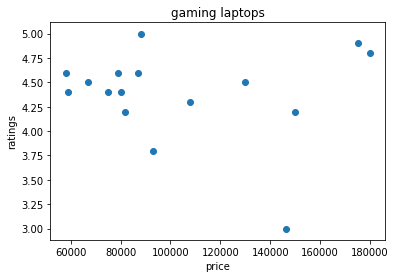

In [24]:
import bs4
import csv
import matplotlib.pyplot as plt
import numpy as np
from urllib.request import urlopen as ureq
from bs4 import BeautifulSoup as soup
my_url = ('https://www.flipkart.com/laptops/~gaming/pr?count=40&p%5B%5D=sort%3Dpopularity&sid=6bo%2Fb5g&wid=2.productCard.PMU_V2_2')
uClient=ureq(my_url)
page_html=uClient.read()
uClient.close()
page_soup=soup(page_html,"html.parser")
containers=page_soup.findAll("div",{"class":"_3wU53n"})
stars=page_soup.findAll("div",{"class":"hGSR34"})
costs=page_soup.findAll("div",{"class":"_1vC4OE _2rQ-NK"})
product_name=[]
ratings=[]
price=[]
for container in containers:
    product_name.append(container.text)
for star in stars:
    ratings.append(star.text)    
for cost in costs:
    price.append(cost.text)
ratings=np.array(ratings,dtype=np.float32)
for i in range(len(price)):
    price[i]=price[i].replace('₹','')
    price[i]=price[i].replace(',','')       
price=np.array(price,dtype=np.float32)
product_name=np.array(product_name)
x=price[:]
y=ratings[:]
plt.scatter(x, y)
plt.xlabel('price')
plt.ylabel('ratings')
plt.title('gaming laptops')
plt.show()